<a href="https://colab.research.google.com/github/lunadacosta/Master-Thesis/blob/master/MLP_ALL_SYMBOLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP Binary Classification with Rspamd Symbols

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd

############# read data using pandas ##############
sybls = pd.read_csv('gdrive/My Drive/Colab Notebooks/dataset/symbols_rspamd.csv')
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/dataset/dataset_spamham2.csv',names=['symbols', 'label'], sep=';')
#check if data has been read in correctly
print(sybls.head())
#df.head()
## randomize dataset
frame = df.sample(frac=1).reset_index(drop=True)
print('Length: ', len(frame))
#print(frame.iloc[0:10,:])

        Symbol
0   ARC_SIGNED
1    ARC_ALLOW
2       ARC_NA
3  ARC_DNSFAIL
4  ARC_INVALID
Length:  2483


In [ ]:
############## split the dataset in train and test dataset ##############
from sklearn.model_selection import train_test_split

symbols = sybls['Symbol'].values
sentences = frame['symbols'].values # returns a NumPy array instead of a Pandas Series object
y = frame['label'].values

sentences_train, sentences_val, y_train, y_val = train_test_split(sentences, y, test_size=0.25, random_state=42)

print(symbols[0:5])
#print(sentences)
#print(y)

['ARC_SIGNED' 'ARC_ALLOW' 'ARC_NA' 'ARC_DNSFAIL' 'ARC_INVALID']


In [ ]:
##### Tokenize using Tokenizer API #######
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

# limit on the length of string sequences. Longer than this will be truncated
MAX_SEQUENCE_LENGTH = 500

# create the tokenizer
t = Tokenizer(
    char_level=False,
    filters="!\"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n", # will prevent ' _ ' of being removed
    lower=False
)

# build the vocabulary on the sentences of the training set
t.fit_on_texts(symbols)

### summarize what was learned
#print(t.word_counts)
#print(t.document_count)
print(t.word_index)
#print(t.word_docs)

Using TensorFlow backend.


{'ARC_SIGNED': 1, 'URIBL_BLOCKED': 2, 'SURBL_BLOCKED': 3, 'DNSWL_BLOCKED': 4, 'DWL_DNSWL_BLOCKED': 5, 'DKIM_SIGNED': 6, 'PH_SURBL_MULTI': 7, 'ARC_ALLOW': 8, 'ARC_NA': 9, 'ARC_DNSFAIL': 10, 'ARC_INVALID': 11, 'ARC_REJECT': 12, 'ARC_CALLBACK': 13, 'RECEIVED_BLOCKLISTDE': 14, 'RBL_BLOCKLISTDE': 15, 'DKIM_TRACE': 16, 'R_DKIM_TEMPFAIL': 17, 'R_DKIM_REJECT': 18, 'R_DKIM_ALLOW': 19, 'DMARC_NA': 20, 'DMARC_POLICY_ALLOW': 21, 'DMARC_POLICY_REJECT': 22, 'DMARC_DNSFAIL': 23, 'DMARC_POLICY_ALLOW_WITH_FAILURES': 24, 'DMARC_CALLBACK': 25, 'DMARC_POLICY_QUARANTINE': 26, 'DMARC_POLICY_SOFTFAIL': 27, 'RCVD_IN_DNSWL_NONE': 28, 'RCVD_IN_DNSWL': 29, 'DWL_DNSWL_MED': 30, 'RCVD_IN_DNSWL_LOW': 31, 'DWL_DNSWL_HI': 32, 'DWL_DNSWL_NONE': 33, 'RCVD_IN_DNSWL_MED': 34, 'DWL_DNSWL': 35, 'DWL_DNSWL_LOW': 36, 'RCVD_IN_DNSWL_HI': 37, 'MSBL_EBL_GREY': 38, 'MSBL_EBL': 39, 'MAILSPIKE': 40, 'RWL_MAILSPIKE_POSSIBLE': 41, 'RWL_MAILSPIKE_VERYGOOD': 42, 'RWL_MAILSPIKE_EXCELLENT': 43, 'RWL_MAILSPIKE_GOOD': 44, 'RWL_MAILSPIKE_N

In [ ]:
# vectorize training and validation texts
x_train = t.texts_to_sequences(sentences_train)
x_val = t.texts_to_sequences(sentences_val)

# Get max sequence length
max_len = len(max(x_train, key=len))
if max_len > MAX_SEQUENCE_LENGTH:
    max_len = MAX_SEQUENCE_LENGTH

# Fix sequence length to max value. Sequences shorter than the length are
# padded in the beginning and sequences longer are truncated
# at the beginning
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_val = sequence.pad_sequences(x_val, maxlen=max_len)

print("x_train vector: ",x_train)
print("x_val vector: ",x_val)

x_train vector:  [[  0   0   0 ... 176 393 259]
 [  0   0   0 ... 371 339 276]
 [  0   0   0 ... 258 339  98]
 ...
 [  0   0   0 ... 393 259 339]
 [  0   0   0 ... 259 371 339]
 [  0   0   0 ... 259 371 339]]
x_val vector:  [[  0   0   0 ... 259 371 339]
 [  0   0   0 ... 259 339 465]
 [  0   0   0 ... 259 373 465]
 ...
 [  0   0   0 ... 339 259 465]
 [  0   0   0 ... 393 259 339]
 [  0   0   0 ... 281 339 259]]


In [ ]:
###### Building a simple MLP with some dropout layers for regularization
#(to prevent overfitting to training samples)#######
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

model = models.Sequential()
model.add(Dropout(rate=0.2, input_shape=x_train.shape[1:]))  # rate: float, percentage of input to drop at Dropout layer.
                                                             # input_shape: tuple, shape of input to the model
model.add(Dense(units=150, activation='relu'))  # units: int, output dimension of the layers
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation='sigmoid'))


W0625 14:23:28.927558 140694345828224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
#### Compiling the model ####

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()  # gives an overview of the model

#### Training model ####

history = model.fit(x_train, y_train, epochs=50, verbose=False, validation_data=(x_val, y_val), batch_size=200)


W0625 14:23:32.593337 140694345828224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 150)               4350      
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 4,501
Trainable params: 4,501
Non-trainable params: 0
_________________________________________________________________


# Results

Training Accuracy:  0.9903
Validation Accuracy:  0.9871


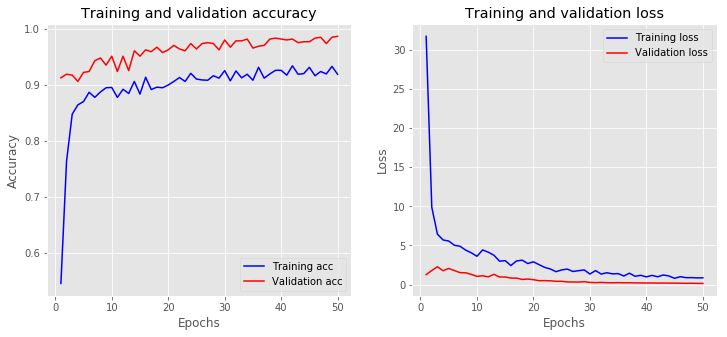

In [ ]:
##### .evaluate() is used to measure the accuracy of the model ########

loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))

####### Visualization of the loss an the accuracy for the training 
#and validation data set ############
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    # plot graphics
    plt.figure(figsize=(12, 5))
    # graphic for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    # graphic for loss
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_history(history)
plt.show()

# Binarization of Input Vectors

In [ ]:
########## Tokenize using CountVectorizer ##############
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
vectorizer = CountVectorizer()
# tokenize an create the vocabulary
vectorizer.fit(symbols)
#summarize
vocab = vectorizer.vocabulary_
print("Vocabulary: ",vocab)
print("Length of Vocab: ", len(vocab))
# encode document
X_train = vectorizer.transform(sentences_train)
X_val = vectorizer.transform(sentences_val)
# transform to binary numpy arrays
X_train = X_train.toarray()
X_val = X_val.toarray()

#summarize encoded training vector
#print(X_train[0])
print("Train shape: ", X_train.shape)
print("Val shape: ", X_val.shape)
print("Train type: ",type(X_train))

Vocabulary:  {'arc_signed': 8, 'arc_allow': 2, 'arc_na': 6, 'arc_dnsfail': 4, 'arc_invalid': 5, 'arc_reject': 7, 'arc_callback': 3, 'uribl_blocked': 462, 'surbl_blocked': 425, 'dnswl_blocked': 66, 'dwl_dnswl_blocked': 68, 'received_blocklistde': 373, 'rbl_blocklistde': 316, 'r_parts_differ': 303, 'has_attachment': 148, 'autogen_php_spammy': 10, 'undisc_rcpts_bulk': 457, 'auth_na': 9, 'rcvd_dkim_arc_dnswl_med': 356, 'rcvd_dkim_arc_dnswl_hi': 355, 'leaked_password_spam_fp': 233, 'compromised_acct_bulk': 30, 'rcvd_unauth_pbl': 369, 'bad_rep_policies': 11, 'phish_emotion': 286, 'violated_direct_spf': 472, 'has_anon_domain': 147, 'ip_score_freemail': 225, 'has_xaw': 171, 'php_script_root': 290, 'uri_hidden_path': 460, 'has_x_source': 170, 'php_xps_pattern': 291, 'www_dot_domain': 478, 'wp_compromised': 477, 'envfrom_service_acct': 79, 'has_x_as': 160, 'mid_rhs_www': 250, 'has_wp_uri': 158, 'has_x_antiabuse': 159, 'has_x_gmsv': 161, 'has_phpmailer_sig': 156, 'hidden_source_obj': 210, 'has_x_

In [ ]:
###### Building a simple MLP with some dropout layers for regularization
#(to prevent overfitting to training samples)#######
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

model = models.Sequential()
model.add(Dropout(rate=0.2, input_shape=X_train.shape[1:]))  # rate: float, percentage of input to drop at Dropout layer.                                                          # input_shape: tuple, shape of input to the model
model.add(Dense(units=150, activation='relu'))  # units: int, output dimension of the layers
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation='sigmoid'))

#### Compiling the model ####

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()  # gives an overview of the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 488)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               73350     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 73,501
Trainable params: 73,501
Non-trainable params: 0
_________________________________________________________________


# Results

Training Accuracy:  1.0000
Validation Accuracy:  1.0000


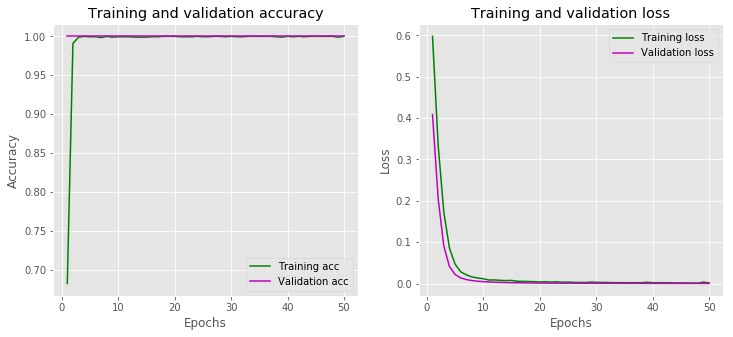

In [ ]:
#### Training model ####

history = model.fit(X_train, y_train, epochs=50, verbose=False, validation_data=(X_val, y_val), batch_size=200)

##### .evaluate() is used to measure the accuracy of the model ########

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))

####### Visualization of the loss an the accuracy for the training
#and validation data set ############
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    # plot graphics
    plt.figure(figsize=(12, 5))
    # graphic for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'm', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    # graphic for loss
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'm', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_history(history)
plt.show()

# Combatting Overfitting with More Data


In [ ]:
import pandas as pd

############# read data using pandas ##############

sybls = pd.read_csv('gdrive/My Drive/Colab Notebooks/dataset/symbols_rspamd.csv')

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/dataset/dataset_spamham_9k.csv',names=['symbols', 'label'], sep=';')

#check if data has been read in correctly

print(sybls.head())

#df.head()

## randomize dataset

frame = df.sample(frac=1).reset_index(drop=True)
print('Length: ', len(frame))

#print(frame.iloc[0:10,:])

        Symbol
0   ARC_SIGNED
1    ARC_ALLOW
2       ARC_NA
3  ARC_DNSFAIL
4  ARC_INVALID
Length:  18466


In [ ]:
############## split the dataset in train and test dataset ##############
from sklearn.model_selection import train_test_split

symbols = sybls['Symbol'].values
sentences = frame['symbols'].values # returns a NumPy array instead of a Pandas Series object
y = frame['label'].values

sentences_train, sentences_val, y_train, y_val = train_test_split(sentences, y, test_size=0.25, random_state=42)

print(symbols[0:5])
#print(sentences)
#print(y)

['ARC_SIGNED' 'ARC_ALLOW' 'ARC_NA' 'ARC_DNSFAIL' 'ARC_INVALID']


In [ ]:
########## Tokenize using CountVectorizer ##############
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
vectorizer = CountVectorizer()
# tokenize an create the vocabulary
vectorizer.fit(symbols)
#summarize
vocab = vectorizer.vocabulary_
print("Vocabulary: ",vocab)
print("Length of Vocab: ", len(vocab))
# encode document
X_train = vectorizer.transform(sentences_train)
X_val = vectorizer.transform(sentences_val)
# transform to binary numpy arrays
X_train = X_train.toarray()
X_val = X_val.toarray()

#summarize encoded training vector
#print(X_train[0])
print("Train shape: ", X_train.shape)
print("Val shape: ", X_val.shape)
print("Train type: ",type(X_train))

Vocabulary:  {'arc_signed': 8, 'arc_allow': 2, 'arc_na': 6, 'arc_dnsfail': 4, 'arc_invalid': 5, 'arc_reject': 7, 'arc_callback': 3, 'uribl_blocked': 462, 'surbl_blocked': 425, 'dnswl_blocked': 66, 'dwl_dnswl_blocked': 68, 'received_blocklistde': 373, 'rbl_blocklistde': 316, 'r_parts_differ': 303, 'has_attachment': 148, 'autogen_php_spammy': 10, 'undisc_rcpts_bulk': 457, 'auth_na': 9, 'rcvd_dkim_arc_dnswl_med': 356, 'rcvd_dkim_arc_dnswl_hi': 355, 'leaked_password_spam_fp': 233, 'compromised_acct_bulk': 30, 'rcvd_unauth_pbl': 369, 'bad_rep_policies': 11, 'phish_emotion': 286, 'violated_direct_spf': 472, 'has_anon_domain': 147, 'ip_score_freemail': 225, 'has_xaw': 171, 'php_script_root': 290, 'uri_hidden_path': 460, 'has_x_source': 170, 'php_xps_pattern': 291, 'www_dot_domain': 478, 'wp_compromised': 477, 'envfrom_service_acct': 79, 'has_x_as': 160, 'mid_rhs_www': 250, 'has_wp_uri': 158, 'has_x_antiabuse': 159, 'has_x_gmsv': 161, 'has_phpmailer_sig': 156, 'hidden_source_obj': 210, 'has_x_

In [ ]:
###### Building a simple MLP with some dropout layers for regularization
#(to prevent overfitting to training samples)#######
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

model = models.Sequential()
model.add(Dropout(rate=0.2, input_shape=X_train.shape[1:]))  # rate: float, percentage of input to drop at Dropout layer.                                                          # input_shape: tuple, shape of input to the model
model.add(Dense(units=150, activation='relu'))  # units: int, output dimension of the layers
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation='sigmoid'))

#### Compiling the model ####

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()  # gives an overview of the model

W0627 15:42:08.160149 140184674908032 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 488)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               73350     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 73,501
Trainable params: 73,501
Non-trainable params: 0
_________________________________________________________________


# Result


Training Accuracy:  0.5312
Validation Accuracy:  0.4063


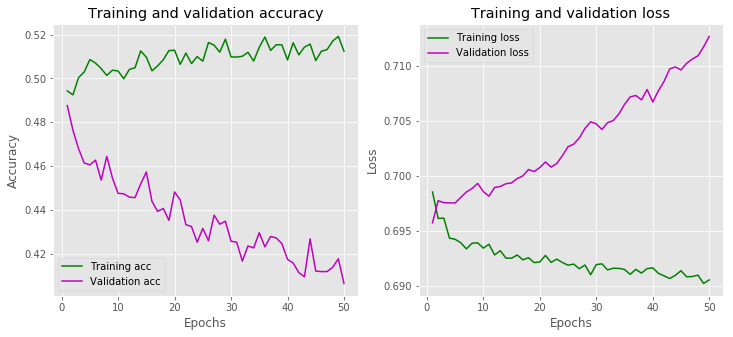

In [ ]:
#### Training model ####

history = model.fit(X_train, y_train, epochs=50, verbose=False, validation_data=(X_val, y_val), batch_size=200)

##### .evaluate() is used to measure the accuracy of the model ########

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))

####### Visualization of the loss an the accuracy for the training
#and validation data set ############
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    # plot graphics
    plt.figure(figsize=(12, 5))
    # graphic for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'm', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    # graphic for loss
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'm', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_history(history)
plt.show()

# Another Code, But does the same

Training CPU Running Time:  8.382024999999999 seconds
Training Accuracy:  0.9979
Validation Accuracy:  0.9938


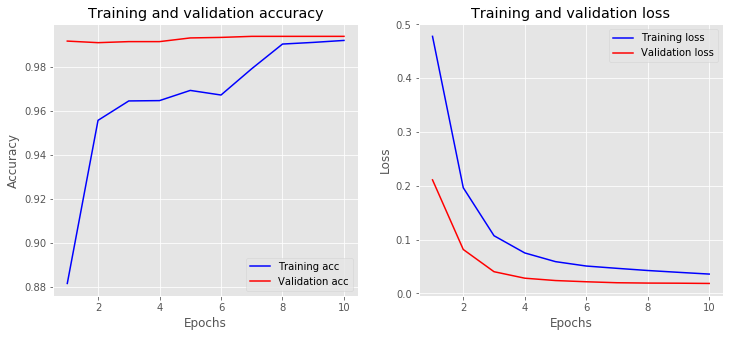

In [ ]:
from numpy.random import seed
from tensorflow import set_random_seed

import pandas as pd

import time
import os
import psutil

from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


##### Seed Random Numbers with TensorFlow Backend
# Keras: Randomness from NumPy random -> use seed() function
seed(2)
# TensorFlow: Has its own random number generator -> use set_random_seed() function
set_random_seed(2)


##### datasets paths #######
dataset_symbols = 'gdrive/My Drive/Colab Notebooks/dataset/SA/symbols_sa.csv'
dataset_train = 'gdrive/My Drive/Colab Notebooks/dataset/SA/kiesel_Train.csv'
dataset_validation = 'gdrive/My Drive/Colab Notebooks/dataset/SA/kiesel_Val.csv'

############# read data using pandas ####################################################
# sybls = pd.read_csv('dataset/SA/kiesel_symbols.csv')
# df = pd.read_csv('dataset/SA/kiesel_spam_ham.csv',names=['symbols', 'label'], sep=';')
#
# ## randomize dataset
# frame = df.sample(frac=1).reset_index(drop=True)

# ##### for separated validation and training sets #####
sybls = pd.read_csv(dataset_symbols)
trainf = pd.read_csv(dataset_train,names=['symbols', 'label'], sep=';')
valf = pd.read_csv(dataset_validation,names=['symbols', 'label'], sep=';')
# randomize dataset
#trainframe = trainf.sample(frac=1).reset_index(drop=True)
#valframe = valf.sample(frac=1).reset_index(drop=True)

#check if data has been read in correctly
#print(sybls.head())
#print(df.head())

#print(frame.iloc[0:10,:])

############## split the dataset in train and test dataset #################################
# from sklearn.model_selection import train_test_split
#
# symbols = sybls['Symbol'].values # returns a NumPy array instead of a Pandas Series object
# sentences = frame['symbols'].values
# y = frame['label'].values
# # split into train/test sets
# sentences_train, sentences_val, y_train, y_val = train_test_split(sentences, y, test_size=0.25, random_state=7)

#print(symbols[0:5])
#print(sentences)
#print(y)

########### If Dataset for training and testing are already separated ##########

symbols = sybls['Symbol'].values
sentences_train = trainf['symbols'].values
y_train = trainf['label'].values
sentences_val = valf['symbols'].values
y_val = valf['label'].values

# print(symbols[0:5])
# print(sentences_train[0:5])
# print(y_train[0:5])
# print(sentences_val[0:5])
# print(y_val[0:5])

########## Tokenize using CountVectorizer ##############

# create the transform
vectorizer = CountVectorizer()
# tokenize an create the vocabulary
vectorizer.fit(symbols)
#summarize
vocab = vectorizer.vocabulary_
#print("Vocabulary: ",vocab)
#print("Length of Vocab: ", len(vocab))
# encode document
X_train = vectorizer.transform(sentences_train)
X_val = vectorizer.transform(sentences_val)
# transform to binary numpy arrays
X_train = X_train.toarray()
X_val = X_val.toarray()
#summarize encoded training vector
#print(X_train)
#print("Train shape: ", X_train.shape)
#print("Val shape: ", X_val.shape)
#print("Train type: ",type(X_train))

###### Building a simple MLP with some dropout layers for regularization
#(to prevent overfitting to training samples)#######

# Function to create model
def create_model(learn_rate, activation, neurons):
    model = models.Sequential()
    model.add(Dropout(rate=0.2, input_shape=X_train.shape[1:]))  # rate: float, percentage of input to drop at Dropout layer.
                                                                 # input_shape: tuple, shape of input to the model: nr of features
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    #### Compiling the model ####
    optimizer = Adam(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# define parameters:
batch_size = 32
epochs = 10
learn_rate = 0.001
activation = 'relu'
neurons = 5

model = create_model(learn_rate, activation, neurons)
#print(model.summary())  # gives an overview of the model

### start recording training running time ####
train_start_time = time.clock()
#### Training model ####
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history = model.fit(X_train, y_train, epochs=epochs, verbose=False, validation_data=(X_val, y_val), batch_size=batch_size) #, callbacks=[es]) #, class_weight={0: 1, 1: 0.2})

#### give final time for training ####
train_end_time = time.clock() - train_start_time
print("Training CPU Running Time: ",train_end_time, "seconds")

##### .evaluate() is used to measure the accuracy of the model ########

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))

####### Visualization of the loss an the accuracy for the training
#and validation data set ############

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    # plot graphics
    plt.figure(figsize=(12, 5))
    # graphic for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    # graphic for loss
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_history(history)
plt.show()


# Model Visualization

In [ ]:
from numpy.random import seed
from tensorflow import set_random_seed

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer


##### Seed Random Numbers with TensorFlow Backend
# Keras: Randomness from NumPy random -> use seed() function
seed(2)
# TensorFlow: Has its own random number generator -> use set_random_seed() function
set_random_seed(2)


##### datasets paths #######
dataset_symbols = 'gdrive/My Drive/Colab Notebooks/dataset/SA/symbols_sa.csv'
dataset_train = 'gdrive/My Drive/Colab Notebooks/dataset/SA/kiesel_Train.csv'
dataset_validation = 'gdrive/My Drive/Colab Notebooks/dataset/SA/kiesel_Val.csv'

############# read data using pandas ####################################################
# sybls = pd.read_csv('dataset/SA/kiesel_symbols.csv')
# df = pd.read_csv('dataset/SA/kiesel_spam_ham.csv',names=['symbols', 'label'], sep=';')
#
# ## randomize dataset
# frame = df.sample(frac=1).reset_index(drop=True)

# ##### for separated validation and training sets #####
sybls = pd.read_csv(dataset_symbols)
trainf = pd.read_csv(dataset_train,names=['symbols', 'label'], sep=';')
valf = pd.read_csv(dataset_validation,names=['symbols', 'label'], sep=';')
# randomize dataset
#trainframe = trainf.sample(frac=1).reset_index(drop=True)
#valframe = valf.sample(frac=1).reset_index(drop=True)

#check if data has been read in correctly
#print(sybls.head())
#print(df.head())

#print(frame.iloc[0:10,:])

############## split the dataset in train and test dataset #################################
# from sklearn.model_selection import train_test_split
#
# symbols = sybls['Symbol'].values # returns a NumPy array instead of a Pandas Series object
# sentences = frame['symbols'].values
# y = frame['label'].values
# # split into train/test sets
# sentences_train, sentences_val, y_train, y_val = train_test_split(sentences, y, test_size=0.25, random_state=7)

#print(symbols[0:5])
#print(sentences)
#print(y)

########### If Dataset for training and testing are already separated ##########

symbols = sybls['Symbol'].values
sentences_train = trainf['symbols'].values
y_train = trainf['label'].values
sentences_val = valf['symbols'].values
y_val = valf['label'].values

# print(symbols[0:5])
# print(sentences_train[0:5])
# print(y_train[0:5])
# print(sentences_val[0:5])
# print(y_val[0:5])

########## Tokenize using CountVectorizer ##############

# create the transform
vectorizer = CountVectorizer()
# tokenize an create the vocabulary
vectorizer.fit(symbols)
#summarize
vocab = vectorizer.vocabulary_
#print("Vocabulary: ",vocab)
#print("Length of Vocab: ", len(vocab))
# encode document
X_train = vectorizer.transform(sentences_train)
X_val = vectorizer.transform(sentences_val)
# transform to binary numpy arrays
X_train = X_train.toarray()
X_val = X_val.toarray()
#summarize encoded training vector
#print(X_train)
#print("Train shape: ", X_train.shape)
#print("Val shape: ", X_val.shape)
#print("Train type: ",type(X_train))

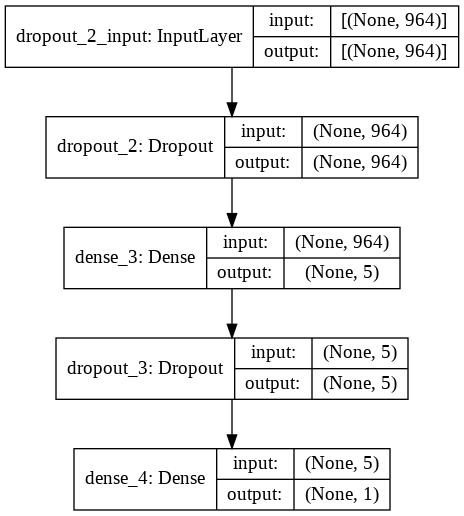

In [ ]:
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.optimizers import Adam

import matplotlib.pyplot as plt

from tensorflow.python.keras.utils import plot_model

# Function to create model
def create_model(learn_rate, activation, neurons):
    model = models.Sequential()
    model.add(Dropout(rate=0.2, input_shape=X_train.shape[1:]))  # rate: float, percentage of input to drop at Dropout layer.
                                                          # input_shape: tuple, shape of input to the model: nr of features
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    #### Compiling the model ####
    optimizer = Adam(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# define parameters:
batch_size = 32
epochs = 10
learn_rate = 0.001
activation = 'relu'
neurons = 5

model = create_model(learn_rate, activation, neurons)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
!pip install ann_visualizer



  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4168 sha256=ef248d6033e68fd1ff6eafdadff07dbbaad0d9807d4fe99dbc02b9ddc322c14f
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz

ann_viz(model, title = "Spam Classifier NN")

Using TensorFlow backend.


ValueError: ignored